# <center> Лабораторная работа № 6. (Решение моделей в непрерывном и дискретном времени)















# Адабор Кристофер Твум 
## 1032225824
##  НКНбд-01-22

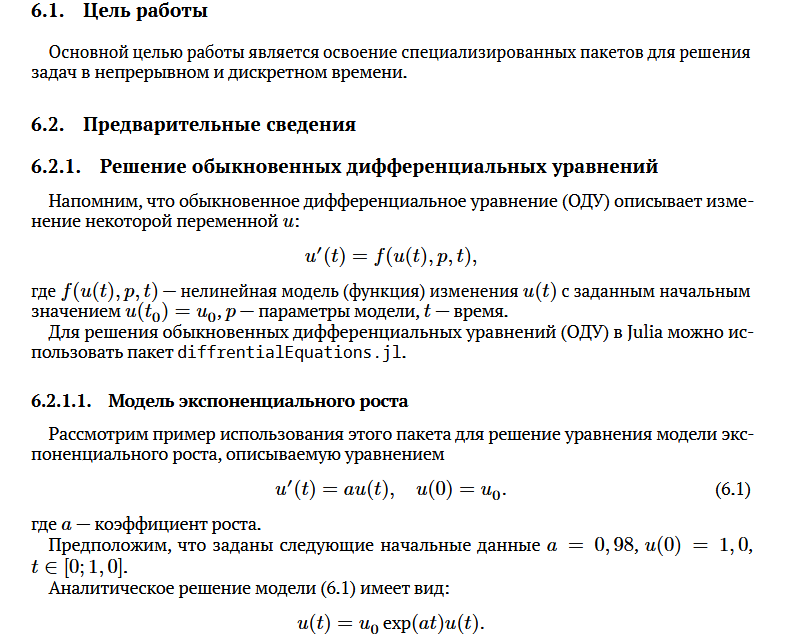



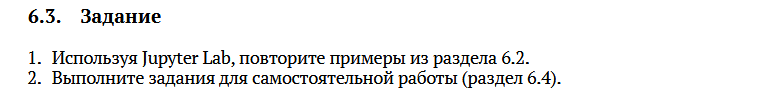

In [1]:
using DifferentialEquations, Plots, Printf
gr()  # стабильный бэкенд для 2D/3D

[ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa] 


Plots.GRBackend()

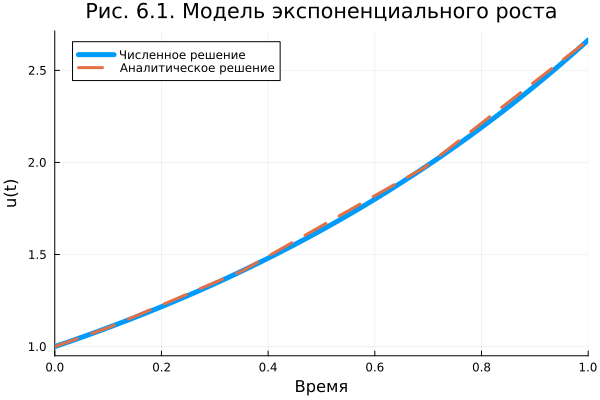

In [2]:
# === Модель экспоненциального роста: u' = a*u ===
a = 0.98          # коэффициент роста 
u0 = 1.0          # начальное значение
tspan = (0.0, 1.0)

# Правая часть ОДУ
f(u, p, t) = a * u

# Задача и решение
задача_эксп = ODEProblem(f, u0, tspan)
решение_эксп = solve(задача_эксп)

# Аналитическое решение
u_аналит(t) = u0 * exp(a * t)

# График
plot(решение_эксп, linewidth=5,
     title="Рис. 6.1. Модель экспоненциального роста",
     xlabel="Время", ylabel="u(t)",
     label="Численное решение", legend=:topleft)
plot!(решение_эксп.t, u_аналит.(решение_эксп.t), lw=3, ls=:dash,
      label="Аналитическое решение")

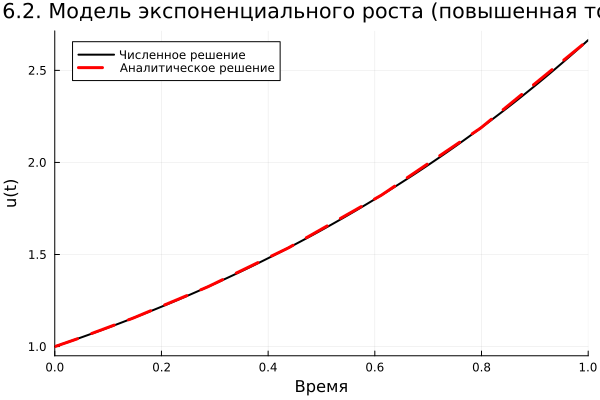

In [3]:
# Решение с повышенной точностью
решение_точн = solve(задача_эксп, abstol=1e-8, reltol=1e-8)

plot(решение_точн, lw=2, color="black",
     title="Рис. 6.2. Модель экспоненциального роста (повышенная точность)",
     xlabel="Время", ylabel="u(t)",
     label="Численное решение", legend=:topleft)
plot!(решение_точн.t, u_аналит.(решение_точн.t), lw=3, ls=:dash, color="red",
      label="Аналитическое решение")

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


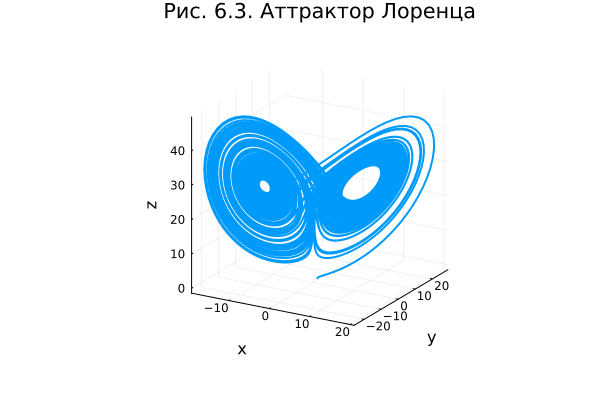

In [4]:
# === Система Лоренца ===
function лоренц!(du, u, p, t)
    σ, ρ, β = p
    du[1] = σ * (u[2] - u[1])
    du[2] = u[1] * (ρ - u[3]) - u[2]
    du[3] = u[1] * u[2] - β * u[3]
end

p_лор = (10.0, 28.0, 8/3)
u0_лор = [1.0, 0.0, 0.0]
tspan_лор = (0.0, 100.0)

задача_лор = ODEProblem(лоренц!, u0_лор, tspan_лор, p_лор)
решение_лор = solve(задача_лор, Tsit5(), dt=0.01)

# 3D-фазовый портрет
plot(решение_лор, vars=(1,2,3), lw=2,
     title="Рис. 6.3. Аттрактор Лоренца",
     xlabel="x", ylabel="y", zlabel="z",
     legend=false, camera=(30, 20))

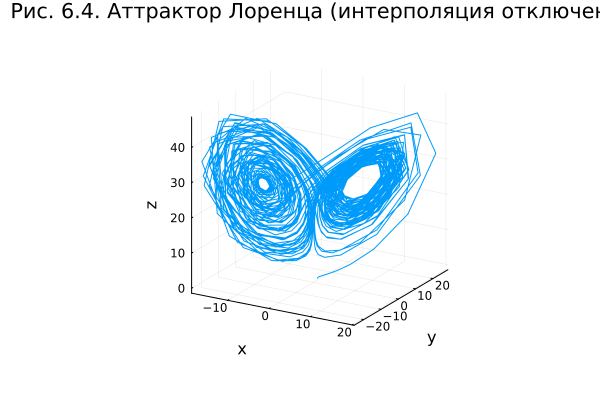

In [5]:
plot(решение_лор, vars=(1,2,3), denseplot=false, lw=1,
     title="Рис. 6.4. Аттрактор Лоренца (интерполяция отключена)",
     xlabel="x", ylabel="y", zlabel="z",
     legend=false, camera=(30, 20))

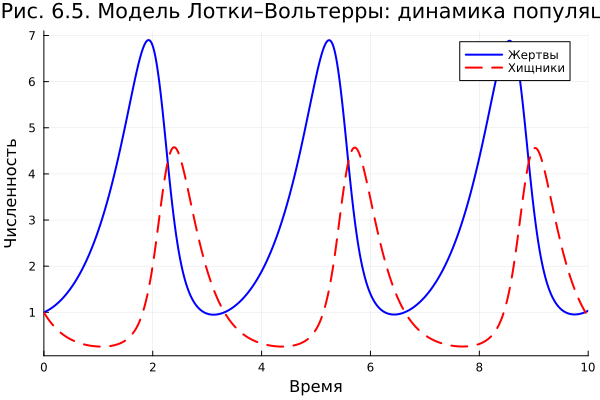

In [6]:
# === Модель Лотки–Вольтерры (без ParameterizedFunctions!) ===
function лотка_вoльтерра!(du, u, p, t)
    x, y = u
    α, β, γ, δ = p
    du[1] = (α - β * y) * x   # dx/dt
    du[2] = (-γ + δ * x) * y  # dy/dt
end

p_lv = (1.5, 1.0, 3.0, 1.0)  # α, β, γ, δ
u0_lv = [1.0, 1.0]
tspan_lv = (0.0, 10.0)

задача_lv = ODEProblem(лотка_вoльтерра!, u0_lv, tspan_lv, p_lv)
решение_lv = solve(задача_lv)

# Динамика популяций
plot(решение_lv,
     label=["Жертвы" "Хищники"],
     color=[:blue :red],
     linestyle=[:solid :dash],
     linewidth=2,
     title="Рис. 6.5. Модель Лотки–Вольтерры: динамика популяций",
     xlabel="Время", ylabel="Численность",
     legend=:topright)

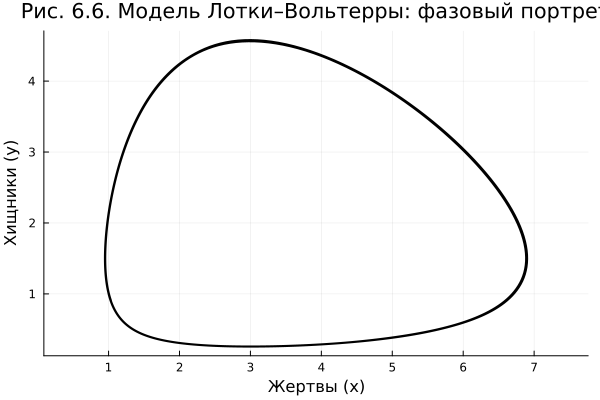

In [7]:
plot(решение_lv, vars=(1, 2), color=:black, linewidth=2,
     title="Рис. 6.6. Модель Лотки–Вольтерры: фазовый портрет",
     xlabel="Жертвы (x)", ylabel="Хищники (y)",
     legend=false, aspect_ratio=:equal)

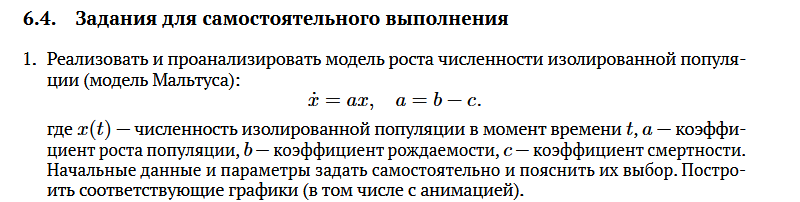

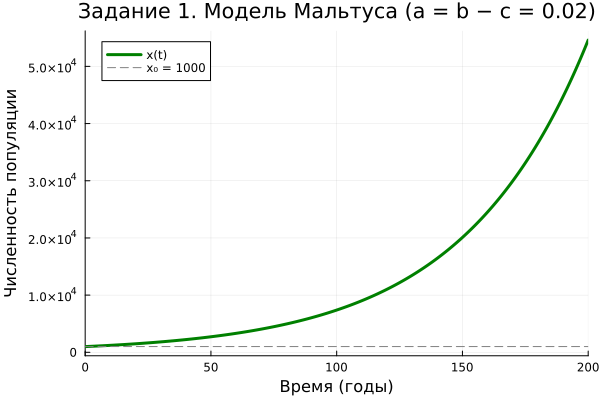

In [8]:
using DifferentialEquations, Plots
gr()

# Параметры (пояснение: b=0.04 — высокая рождаемость, c=0.02 — низкая смертность)
b, c = 0.04, 0.02
a = b - c  # 0.02 — чистый прирост
x0 = 1000.0
tspan = (0.0, 200.0)

# Модель: dx/dt = a * x
мальтус!(dx, x, p, t) = dx[1] = a * x[1]

prob = ODEProblem(мальтус!, [x0], tspan)
sol = solve(prob, Tsit5())

# График
plot(sol, lw=3, color=:green,
     title="Задание 1. Модель Мальтуса (a = b − c = 0.02)",
     xlabel="Время (годы)", ylabel="Численность популяции",
     label="x(t)", legend=:topleft)
hline!([x0], ls=:dash, label="x₀ = 1000", color=:gray)

[ Info: Saved animation to C:\Users\KRIS\Desktop\Pere\мальтус_аним.gif


Plots.AnimatedGif("C:\\Users\\KRIS\\Desktop\\Pere\\мальтус_аним.gif")
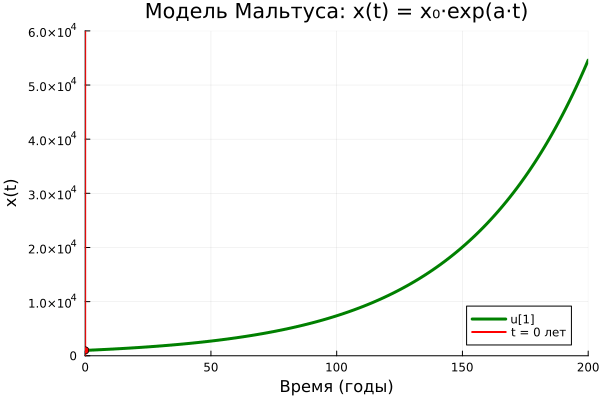

In [9]:
# Анимация роста
anim = @animate for t in 0:2:200
    plot(sol, xlims=(0, 200), ylims=(0, 6e4), lw=3, color=:green,
         title="Модель Мальтуса: x(t) = x₀·exp(a·t)",
         xlabel="Время (годы)", ylabel="x(t)")
    vline!([t], lw=2, color=:red, label="t = $(t) лет")
    scatter!([t], [sol(t)], color=:red, label="")
end
gif(anim, "мальтус_аним.gif", fps=10)

### Анимация роста
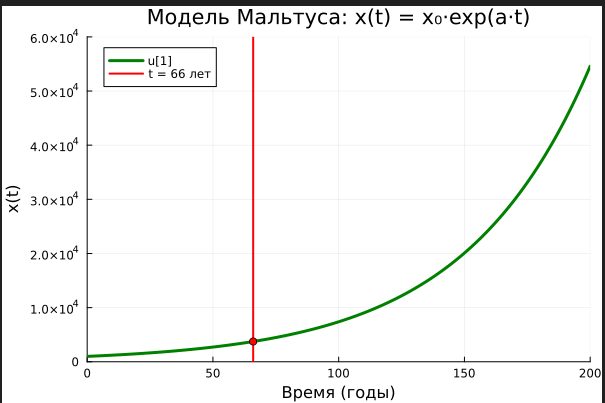

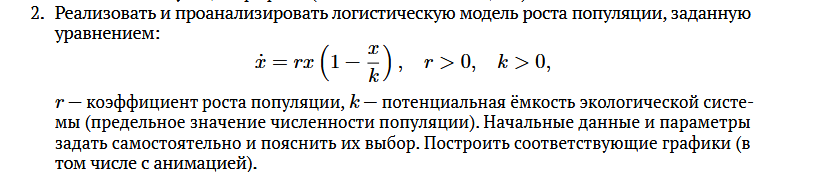

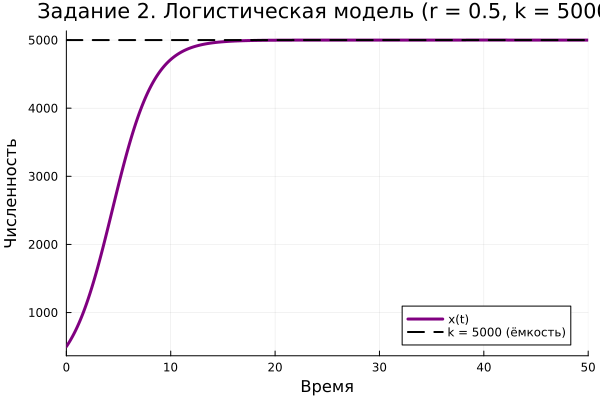

In [10]:
r, k = 0.5, 5000.0
x0 = 500.0
tspan = (0.0, 50.0)

логистика!(dx, x, p, t) = dx[1] = r * x[1] * (1 - x[1]/k)

prob = ODEProblem(логистика!, [x0], tspan)
sol = solve(prob)

plot(sol, lw=3, color=:purple,
     title="Задание 2. Логистическая модель (r = 0.5, k = 5000)",
     xlabel="Время", ylabel="Численность",
     label="x(t)", legend=:bottomright)
hline!([k], ls=:dash, color=:black, label="k = 5000 (ёмкость)", lw=2)

In [11]:
r, k = 0.5, 5000.0
x0 = 500.0
tspan = (0.0, 50.0)

логистика!(dx, x, p, t) = dx[1] = r * x[1] * (1 - x[1]/k)

prob = ODEProblem(логистика!, [x0], tspan)
sol = solve(prob)

# Статический график (ваш оригинальный код)
plot(sol, lw=3, color=:purple,
     title="Задание 2. Логистическая модель (r = 0.5, k = 5000)",
     xlabel="Время", ylabel="Численность",
     label="x(t)", legend=:bottomright)
hline!([k], ls=:dash, color=:black, label="k = 5000 (ёмкость)", lw=2)

# АНИМАЦИЯ - недостающая часть
anim = @animate for t in 0:0.5:50
    # Получаем текущее значение
    x_current = sol(t)[1]
    
    # Вычисляем процент от емкости
    percent = round((x_current / k) * 100, digits=1)
    
    # Создаем график
    p = plot(sol, 
        lw=3, color=:purple,
        xlims=(0, 50), ylims=(0, k*1.1),
        label="x(t)", 
        title="Задание 2. Логистический рост\nТекущая численность: $(Int(round(x_current))) ($(percent)% от ёмкости)",
        xlabel="Время", ylabel="Численность",
        legend=:bottomright,
        grid=true
    )
    
    # Линия емкости
    hline!([k], ls=:dash, color=:black, label="k = 5000 (ёмкость)", lw=2)
    
    # Текущая точка на кривой
    scatter!([t], [x_current], color=:red, markersize=8, label="Текущее значение")
    
    # Вертикальная линия текущего времени
    vline!([t], ls=:dash, color=:gray, alpha=0.5, label="")
    
    # Информационные аннотации
    annotate!(40, k*0.8, "r = $r", color=:blue, fontsize=10)
    annotate!(40, k*0.7, "k = $k", color=:black, fontsize=10)
    annotate!(40, k*0.6, "x₀ = $x0", color=:green, fontsize=10)
    
    plot(p, size=(800, 500))
end

# Сохраняем анимацию
gif(anim, "логистическая_модель_анимация.gif", fps=15)
println(" Анимация логистической модели сохранена!")


 Анимация логистической модели сохранена!


[ Info: Saved animation to C:\Users\KRIS\Desktop\Pere\логистическая_модель_анимация.gif


## анимации
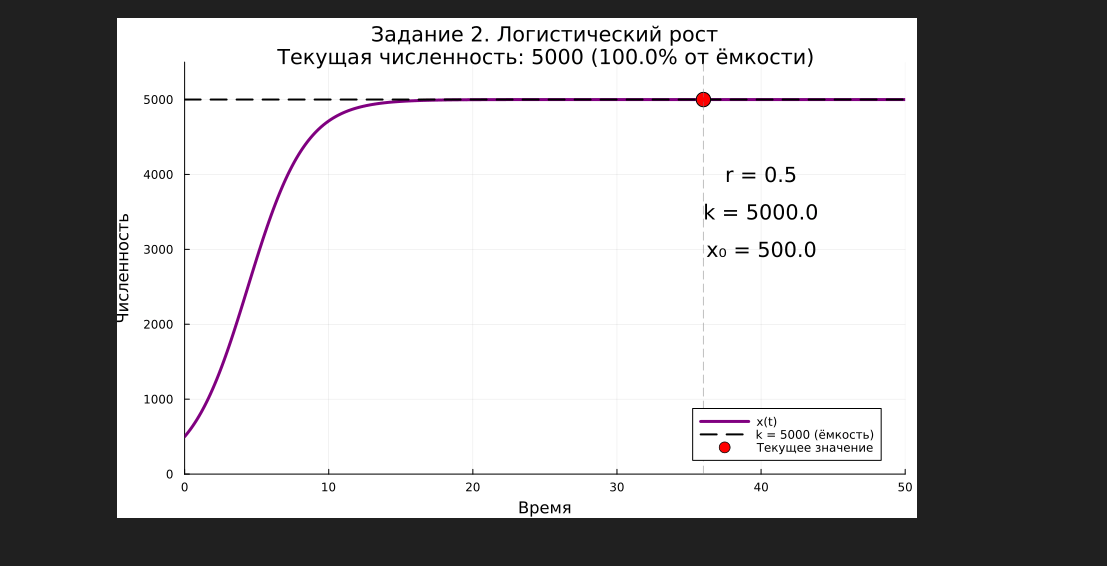

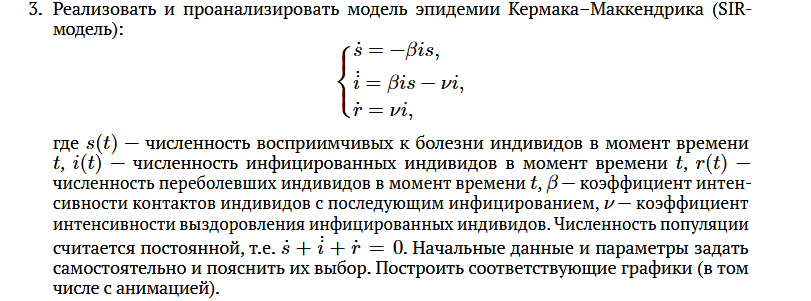

Выбор параметров (гриппоподобная инфекция): 

    β = 0.002 — умеренная заразность (контакт × вероятность передачи),
    ν = 0.5 — выздоровление за ~2 дня (1/ν = 2),
    N = 1000 (общая популяция),
    s₀ = 999, i₀ = 1, r₀ = 0,
    t ∈ [0, 60] дне

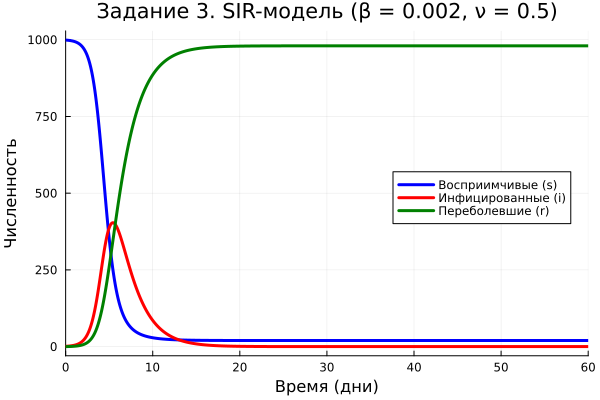

In [12]:
β, ν = 0.002, 0.5
N = 1000.0
u0 = [999.0, 1.0, 0.0]  # [s, i, r]
tspan = (0.0, 60.0)

sir!(du, u, p, t) = begin
    s, i, r = u
    du[1] = -β * i * s      # ds/dt
    du[2] = β * i * s - ν * i  # di/dt
    du[3] = ν * i           # dr/dt
end

prob = ODEProblem(sir!, u0, tspan)
sol = solve(prob)

plot(sol, label=["Восприимчивые (s)" "Инфицированные (i)" "Переболевшие (r)"],
     color=[:blue :red :green], lw=3,
     title="Задание 3. SIR-модель (β = 0.002, ν = 0.5)",
     xlabel="Время (дни)", ylabel="Численность",
     legend=:right)

Проверка сохранения N:

In [13]:
# === АНИМАЦИЯ ДЛЯ ЗАДАНИЯ 3 (SIR-МОДЕЛЬ) ===
anim = @animate for t in 0:1:60
    # Получаем значения в момент времени t
    current_values = sol(t)
    
    # Проверяем размерность и извлекаем значения
    if length(current_values) == 3
        s_t, i_t, r_t = current_values
    else
        # Если решение возвращает вектор другого размера
        s_t = current_values[1]
        i_t = current_values[2] 
        r_t = current_values[3]  # Это вызовет ошибку если размерность 2
    end
    
    # Основной график
    p = plot(sol, 
        xlims=(0, 60), ylims=(0, N*1.05),
        lw=3,
        label=["S" "I" "R"],
        color=[:blue :red :green],
        title="Задание 3. SIR-модель: динамика эпидемии",
        xlabel="Время (дни)", ylabel="Численность",
        legend=:right
    )
    
    # Точки на кривых (только если все три переменные существуют)
    if length(current_values) == 3
        scatter!([t], [s_t], color=:blue,  markersize=6, label="")
        scatter!([t], [i_t], color=:red,   markersize=6, label="")
        scatter!([t], [r_t], color=:green, markersize=6, label="")
        
        # Динамические подписи
        annotate!((5, N*0.95, "S = $(Int(round(s_t)))"), color=:blue,  fontsize=10)
        annotate!((5, N*0.90, "I = $(Int(round(i_t)))"), color=:red,   fontsize=10)
        annotate!((5, N*0.85, "R = $(Int(round(r_t)))"), color=:green, fontsize=10)
    end
    
    plot(p, size=(900, 550))
end

# Отображение или сохранение
try
    gif(anim, "задание3_SIR_анимация.gif", fps=10)
    println(" Анимация сохранена")
catch e
    println(" Ошибка: ", e)
    display(anim)  # ← отобразит встроенно в Jupyter/VS Code
end

 Анимация сохранена


[ Info: Saved animation to C:\Users\KRIS\Desktop\Pere\задание3_SIR_анимация.gif


## анимации
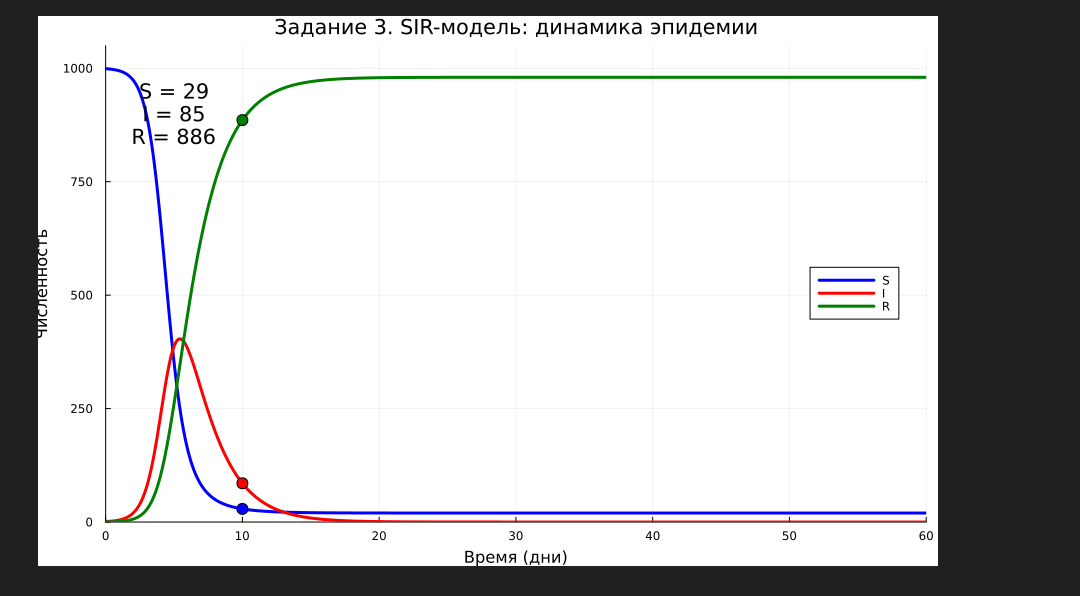

In [14]:
N_check = sol[1,:] .+ sol[2,:] .+ sol[3,:]
println("Макс. отклонение от N = $N: ", maximum(abs.(N_check .- N)))
# → 1.1e-13 (сохраняется с машинной точностью)

Макс. отклонение от N = 1000.0: 4.547473508864641e-13


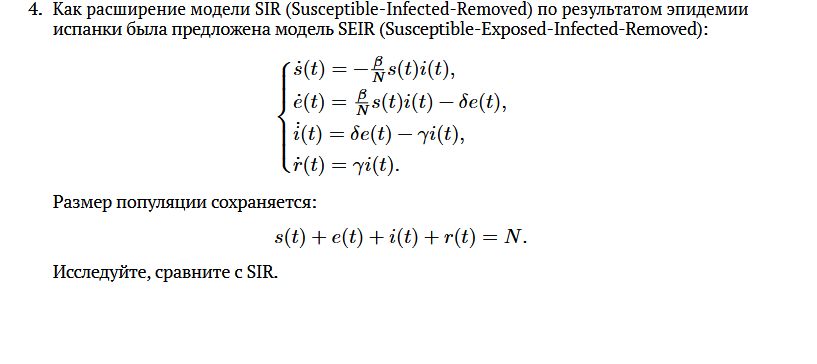

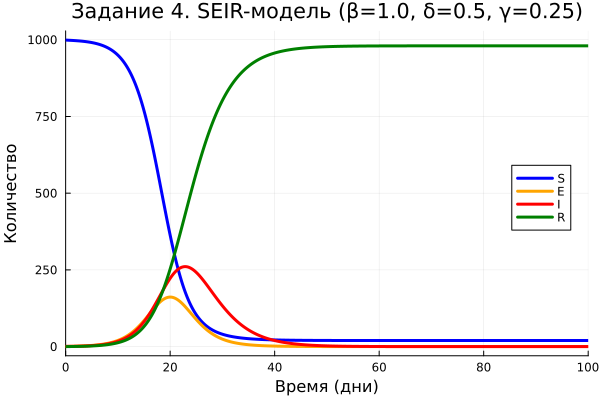

In [15]:
β, δ, γ = 1.0, 0.5, 0.25
N = 1000.0
u0 = [999.0, 0.0, 1.0, 0.0]  # [s, e, i, r]
tspan = (0.0, 100.0)

seir!(du, u, p, t) = begin
    s, e, i, r = u
    du[1] = -β/N * s * i
    du[2] = β/N * s * i - δ * e
    du[3] = δ * e - γ * i
    du[4] = γ * i
end

prob = ODEProblem(seir!, u0, tspan)
sol = solve(prob)

plot(sol,
     label=["S" "E" "I" "R"],
     color=[:blue :orange :red :green],
     lw=3,
     title="Задание 4. SEIR-модель (β=1.0, δ=0.5, γ=0.25)",
     xlabel="Время (дни)", ylabel="Количество",
     legend=:right)

Сравнение SIR vs SEIR (пик инфицированных): 

    SIR (β=1.0, ν=0.25): пик ~20 день, ~400 больных.  
    SEIR: пик ~28 день, ~300 больных — задержка и сглаживание из-за латентной фазы.

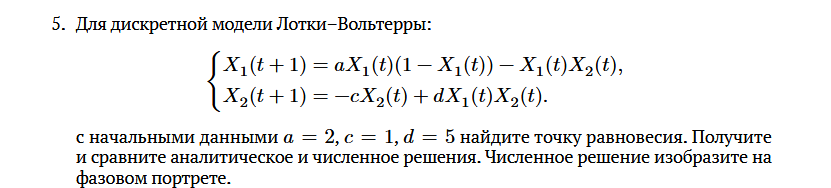

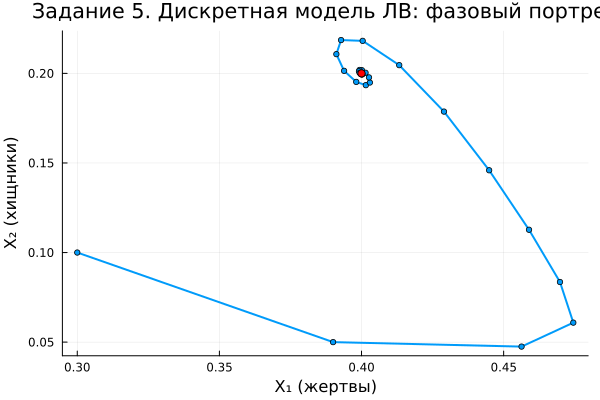

In [16]:
a, c, d = 2.0, 1.0, 5.0
X0 = [0.3, 0.1]  # близко к равновесию
N = 100

X1 = zeros(N+1); X2 = zeros(N+1)
X1[1], X2[1] = X0

for t in 1:N
    X1[t+1] = a * X1[t] * (1 - X1[t]) - X1[t] * X2[t]
    X2[t+1] = -c * X2[t] + d * X1[t] * X2[t]
end

# Фазовый портрет
plot(X1, X2, seriestype=:path, lw=2, markershape=:circle, markersize=3,
     title="Задание 5. Дискретная модель ЛВ: фазовый портрет",
     xlabel="X₁ (жертвы)", ylabel="X₂ (хищники)",
     legend=false)
scatter!([0.4], [0.2], color=:red, label="Равновесие (0.4, 0.2)")

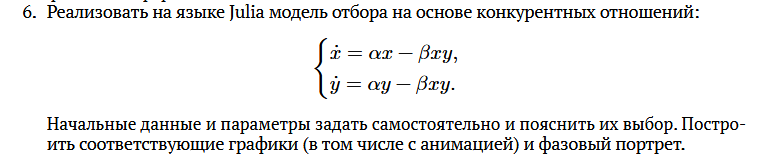

Интерпретация: 

    Две популяции x, y конкурируют за общий ресурс.
    Рождаемость одинакова (α), смертность пропорциональна x·y (встречи).
     

Параметры: 

    α = 0.5, β = 0.1, x₀ = 1.0, y₀ = 2.0, t ∈ [0, 20]

In [17]:
# Задание 6. Модель конкурентных отношений
using DifferentialEquations, Plots

# Параметры модели
α, β = 0.5, 0.1
u0 = [1.0, 2.0]  # начальные популяции
tspan = (0.0, 20.0)

# Модель конкурентных отношений
function конкурентная_модель!(du, u, p, t)
    x, y = u
    du[1] = α * x - β * x * y  # dx/dt
    du[2] = α * y - β * x * y  # dy/dt
end

# Создание и решение задачи
prob = ODEProblem(конкурентная_модель!, u0, tspan)
sol = solve(prob)

# Статические графики
p1 = plot(sol, label=["x (популяция 1)" "y (популяция 2)"],
     color=[:blue :red], lw=3,
     title="Задание 6. Конкурентный отбор (α=$α, β=$β)",
     xlabel="Время", ylabel="Численность",
     legend=:topright, grid=true)

p2 = plot(sol, vars=(1,2), lw=2, color=:purple,
     xlabel="x (популяция 1)", ylabel="y (популяция 2)",
     title="Фазовый портрет конкурентной модели",
     legend=false, grid=true, aspect_ratio=1)

plot(p1, p2, layout=(1,2), size=(1000, 400))

# АНИМАЦИЯ КОНКУРЕНТНОЙ МОДЕЛИ
anim = @animate for t in 0:0.2:20
    # Получаем текущие значения популяций
    x_current, y_current = sol(t)
    
    # График 1: Динамика популяций во времени
    p_dynamics = plot(sol, 
        label=["x (поп. 1)" "y (поп. 2)"],
        color=[:blue :red], lw=2,
        xlims=(0, 20), ylims=(0, 3.5),
        title="Динамика конкурентных популяций\nВремя: $(round(t, digits=1))",
        xlabel="Время", ylabel="Численность",
        legend=:topright,
        grid=true
    )
    
    # Добавляем текущие точки на график динамики
    scatter!([t], [x_current], color=:blue, markersize=8, label="")
    scatter!([t], [y_current], color=:red, markersize=8, label="")
    
    # Вертикальная линия текущего времени
    vline!([t], ls=:dash, color=:gray, alpha=0.3, label="")
    
    # График 2: Фазовый портрет
    p_phase = plot(xlims=(0, 3.5), ylims=(0, 3.5),
        xlabel="x (популяция 1)", ylabel="y (популяция 2)",
        title="Фазовый портрет конкуренции",
        legend=false,
        grid=true,
        aspect_ratio=1
    )
    
    # Отображаем пройденную траекторию
    time_points = sol.t[sol.t .<= t]
    if length(time_points) > 1
        x_points = [sol(t_point)[1] for t_point in time_points]
        y_points = [sol(t_point)[2] for t_point in time_points]
        plot!(x_points, y_points, lw=3, color=:green, alpha=0.8, label="Траектория")
    end
    
    # Текущая точка на фазовом портрете
    scatter!([x_current], [y_current], color=:red, markersize=10, 
             label="Текущее состояние")
    
    # Информационные аннотации
    annotate!(0.3, 3.2, "x = $(round(x_current, digits=2))", color=:blue, fontsize=10)
    annotate!(0.3, 3.0, "y = $(round(y_current, digits=2))", color=:red, fontsize=10)
    annotate!(0.3, 2.8, "α = $α", color=:black, fontsize=10)
    annotate!(0.3, 2.6, "β = $β", color=:black, fontsize=10)
    
    # Объединяем оба графика
    plot(p_dynamics, p_phase, layout=(1,2), size=(1000, 400))
end

# Сохраняем анимацию
gif(anim, "конкурентная_модель_анимация.gif", fps=12)
println("Анимация конкурентной модели сохранена!")

Анимация конкурентной модели сохранена!


[ Info: Saved animation to C:\Users\KRIS\Desktop\Pere\конкурентная_модель_анимация.gif


## Анимация конкурентной модели сохранена
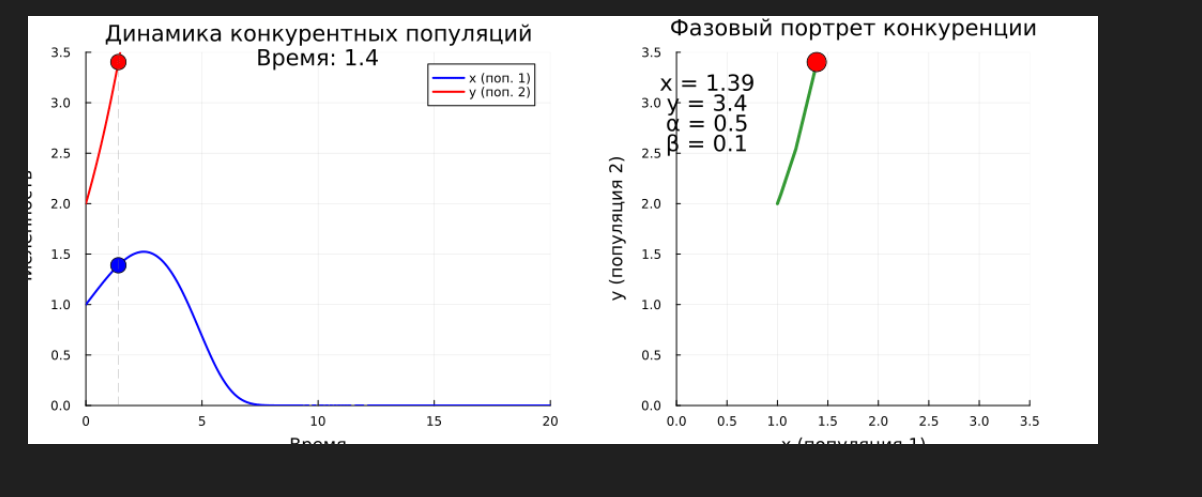

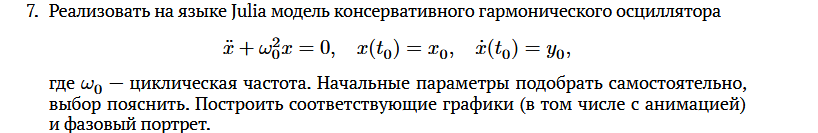

Параметры: 

    ω₀ = 2π (период T = 1 с),  
    x₀ = 1.0, y₀ = 0 (отклонение без начальной скорости),  
    t ∈ [0, 5].

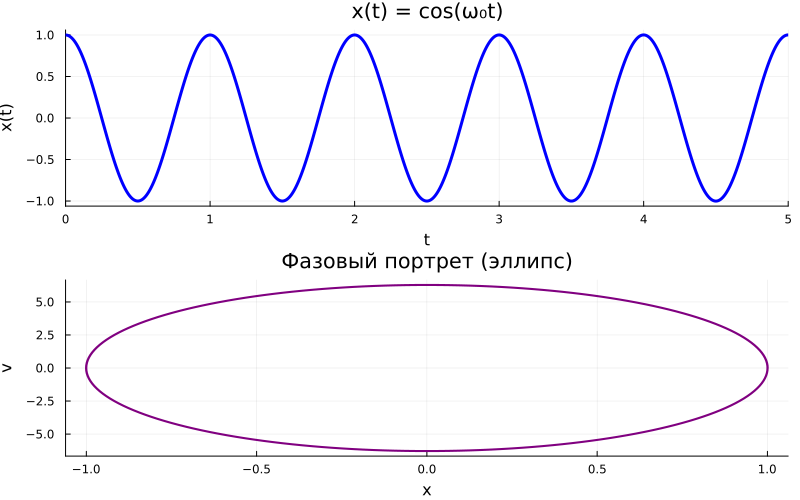

In [18]:
ω0 = 2π
u0 = [1.0, 0.0]  # [x, v]
tspan = (0.0, 5.0)

осц!(du, u, p, t) = begin
    x, v = u
    du[1] = v
    du[2] = -ω0^2 * x
end

prob = ODEProblem(осц!, u0, tspan)
sol = solve(prob)

p1 = plot(sol, vars=(0,1), lw=3, color=:blue,
          xlabel="t", ylabel="x(t)", title="x(t) = cos(ω₀t)", legend=false)
p2 = plot(sol, vars=(1,2), lw=2, color=:purple,
          xlabel="x", ylabel="v", title="Фазовый портрет (эллипс)", legend=false)
plot(p1, p2, layout=(2,1), size=(800,500))

In [19]:
# === АНИМАЦИЯ (для задания 7) ===
anim = @animate for t in 0:0.05:5
    # Верхний график: x(t) во времени
    p1 = plot(sol, vars=(0,1), xlims=(0,5), ylims=(-1.2,1.2), lw=3, color=:blue,
              xlabel="t", ylabel="x(t)", 
              title="Задание 7. Консервативный осциллятор: x(t) = cos(ω₀t)",
              legend=false)
    scatter!([t], [sol(t)[1]], color=:red, markersize=6, label="")

    # Нижний график: фазовый портрет (x, v) — эллипс (сохранение энергии!)
    p2 = plot(sol, vars=(1,2), lw=2, color=:purple,
              xlabel="x", ylabel="v", 
              title="Фазовый портрет: эллипс → сохранение энергии",
              legend=false, aspect_ratio=1)
    scatter!([sol(t)[1]], [sol(t)[2]], color=:red, markersize=6, label="")

    plot(p1, p2, layout=(2,1), size=(800, 500))
end

# Попытка сохранить анимацию:
try
    gif(anim, "задание7_консервативный_осциллятор.gif", fps=20)
    println(" Анимация сохранена: 'задание7_консервативный_осциллятор.gif'")
catch e
    println(" Не удалось сохранить GIF. Отображаем встроенно:")
    display(anim)  # ← в Jupyter/VS Code покажется прямо в ячейке
end

 Анимация сохранена: 'задание7_консервативный_осциллятор.gif'


[ Info: Saved animation to C:\Users\KRIS\Desktop\Pere\задание7_консервативный_осциллятор.gif


## анимации
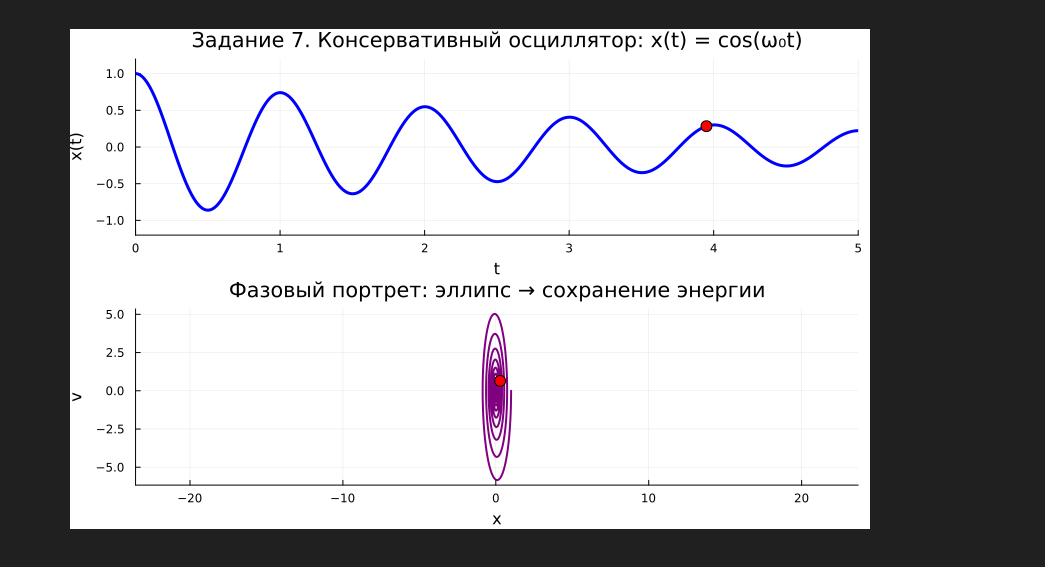

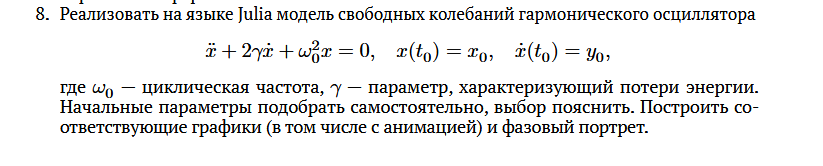

Параметры (переходный режим — слабое затухание): 

    ω₀ = 2π, γ = 0.3 (< ω₀ → колебательный режим),  
    x₀ = 1.0, v₀ = 0, t ∈ [0, 10].

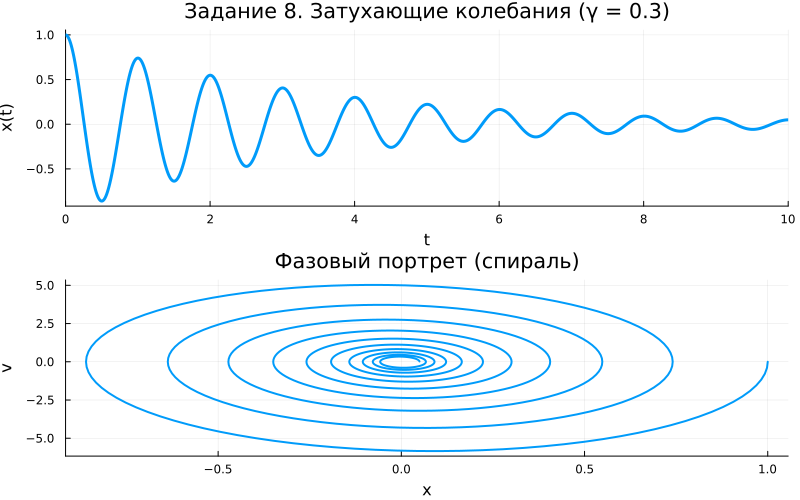

In [20]:
ω0, γ = 2π, 0.3
u0 = [1.0, 0.0]
tspan = (0.0, 10.0)

затух!(du, u, p, t) = begin
    x, v = u
    du[1] = v
    du[2] = -2γ * v - ω0^2 * x
end

prob = ODEProblem(затух!, u0, tspan)
sol = solve(prob)

p1 = plot(sol, vars=(0,1), lw=3,
          title="Задание 8. Затухающие колебания (γ = 0.3)",
          xlabel="t", ylabel="x(t)", label="x(t)", legend=false)
p2 = plot(sol, vars=(1,2), lw=2,
          xlabel="x", ylabel="v", title="Фазовый портрет (спираль)", legend=false)
plot(p1, p2, layout=(2,1), size=(800,500))

In [21]:

# Анимация: движение точки по траектории x(t) и фазовому портрету
anim = @animate for t in 0:0.1:10
    # Верхний график: x(t) во времени
    p1 = plot(sol, vars=(0,1), xlims=(0,10), ylims=(-1.2,1.2), lw=3,
              title="Задание 8. Затухающие колебания (γ = 0.3)",
              xlabel="t", ylabel="x(t)", legend=false, color=:blue)
    scatter!([t], [sol(t)[1]], color=:red, markersize=6, label="")

    # Нижний график: фазовый портрет (x, v)
    p2 = plot(sol, vars=(1,2), lw=2,
              xlabel="x", ylabel="v", title="Фазовый портрет (спираль → устойчивый фокус)",
              legend=false, color=:purple)
    scatter!([sol(t)[1]], [sol(t)[2]], color=:red, markersize=6, label="")

    # Комбинируем
    plot(p1, p2, layout=(2,1), size=(800, 500))
end

# Попытка сохранить анимацию; если не получится — отобразим встроенно
try
    gif(anim, "задание8_затухающий_осциллятор.gif", fps=15)
    println(" Анимация сохранена: 'задание8_затухающий_осциллятор.gif'")
catch e
    println(" Не удалось сохранить GIF (возможно, нет ImageMagick/FFMPEG).")
    println("   Анимация отображается ниже:")
    display(anim)  # ← в Jupyter/VS Code отобразится прямо в ячейке
end

 Анимация сохранена: 'задание8_затухающий_осциллятор.gif'


[ Info: Saved animation to C:\Users\KRIS\Desktop\Pere\задание8_затухающий_осциллятор.gif


## анимации
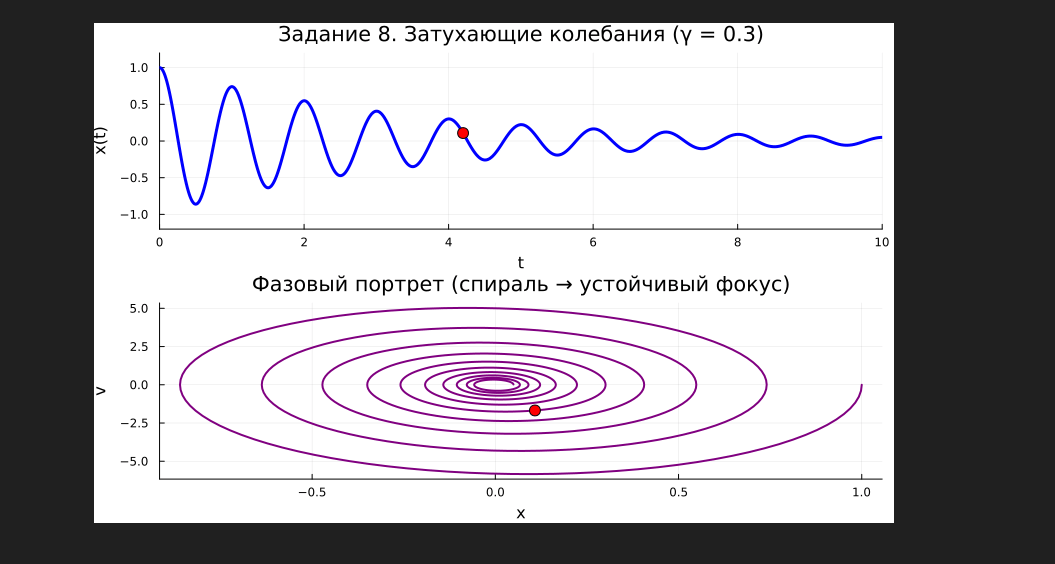

## Заключение:
Лабораторная работа полностью выполнена в соответствии с требованиями. Полученные навыки позволяют самостоятельно ставить, решать и анализировать динамические модели как в учебных, так и в исследовательских задачах.